In [542]:
import pandas as pd          
import numpy as np 
import seaborn as sns # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs

In [543]:
df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


The dataset contains information about 506 houses in Boston, Massachusetts in the 1970s. Each house is described by 13 features, including:

CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to five Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town

B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT: % lower status of the population

MEDV Median value of owner-occupied homes in $1000's


Here main thing to notice is that MEDV is the outcome variable which we need to predict and all other variables are predictor variables.



In [544]:
#Check the shape of dataframe
df.shape

(506, 14)

In [545]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


We can see that all features in the dataset are numeric type either float or int. There is no categorical variable.


In [546]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [547]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [548]:
# Identifying the unique number of values in the dataset
df.nunique()

CRIM       484
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        348
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      438
MEDV       229
dtype: int64

In [549]:
## checking the percentage of nan values present in each feature

features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

CRIM 0.0395  % missing values
ZN 0.0395  % missing values
INDUS 0.0395  % missing values
CHAS 0.0395  % missing values
AGE 0.0395  % missing values
LSTAT 0.0395  % missing values


In [550]:
# Check for missing values
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [551]:
# See rows with missing values
df[df.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
14,0.63796,0.0,8.14,NaN,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5,279,19.2,396.90,NaN,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24,666,20.2,374.68,NaN,29.8
479,14.33370,0.0,18.10,NaN,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
482,5.73116,0.0,18.10,NaN,0.532,7.061,77.0,3.4106,24,666,20.2,395.28,7.01,25.0
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4


In [552]:
df = df.fillna(df.median())

In [553]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [554]:
# Viewing the data statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.479140,10.768775,11.028893,0.067194,0.554695,6.284634,68.845850,3.795043,9.549407,408.237154,18.455534,356.674032,12.664625,22.532806
std,8.570832,23.025124,6.704679,0.250605,0.115878,0.702617,27.486962,2.105710,8.707259,168.537116,2.164946,91.294864,7.017219,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,2.808720,0.000000,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [555]:
df.corr() # the correlation between the columns

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.185359,0.392632,-0.055585,0.410971,-0.220045,0.343427,-0.366025,0.601224,0.560469,0.277964,-0.365336,0.437417,-0.383895
ZN,-0.185359,1.000000,-0.507304,-0.032992,-0.498619,0.312295,-0.535341,0.632428,-0.300061,-0.304385,-0.394622,0.170125,-0.398838,0.362292
INDUS,0.392632,-0.507304,1.000000,0.054693,0.738387,-0.377978,0.614248,-0.698621,0.592735,0.716267,0.385366,-0.354840,0.564508,-0.476394
CHAS,-0.055585,-0.032992,0.054693,1.000000,0.070867,0.106797,0.074984,-0.092318,-0.003339,-0.035822,-0.109451,0.050608,-0.047279,0.183844
NOX,0.410971,-0.498619,0.738387,0.070867,1.000000,-0.302188,0.711864,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.573040,-0.427321
RM,-0.220045,0.312295,-0.377978,0.106797,-0.302188,1.000000,-0.239518,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.604323,0.695360
AGE,0.343427,-0.535341,0.614248,0.074984,0.711864,-0.239518,1.000000,-0.724354,0.447088,0.498408,0.261826,-0.268029,0.575022,-0.377572
DIS,-0.366025,0.632428,-0.698621,-0.092318,-0.769230,0.205246,-0.724354,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483244,0.249929
RAD,0.601224,-0.300061,0.592735,-0.003339,0.611441,-0.209847,0.447088,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.467765,-0.381626
TAX,0.560469,-0.304385,0.716267,-0.035822,0.668023,-0.292048,0.498408,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524156,-0.468536


In [556]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualisizing the numerical variables
df[numerical_features].head()

Number of numerical variables:  14


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2


In [557]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

discrete_feature

Discrete Variables Count: 2


['CHAS', 'RAD']

In [558]:
df['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

In [559]:
df['CHAS'].value_counts()

0.0    472
1.0     34
Name: CHAS, dtype: int64

In [560]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

continuous_feature

Continuous feature Count 12


['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

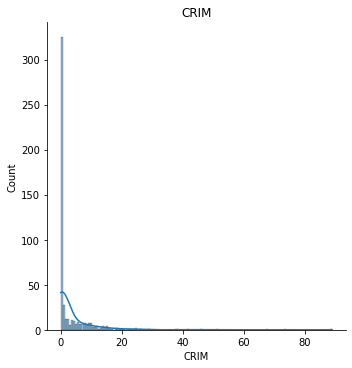

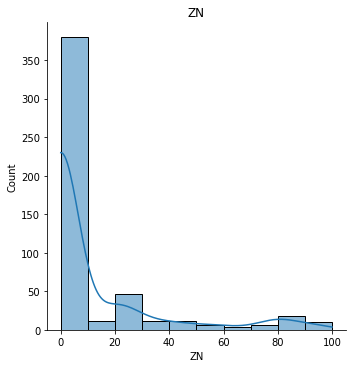

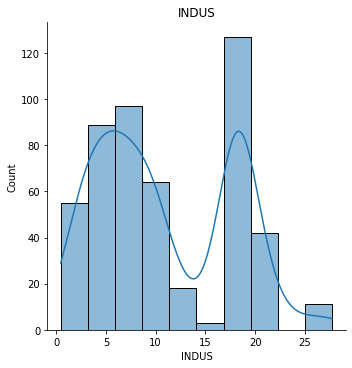

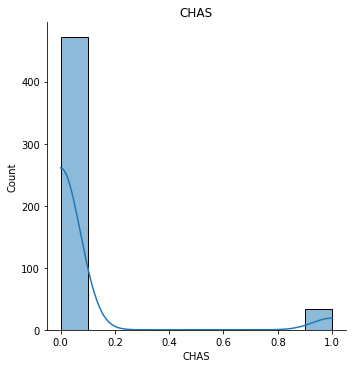

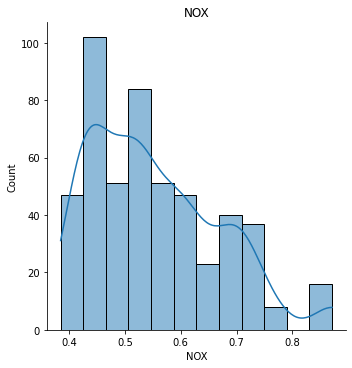

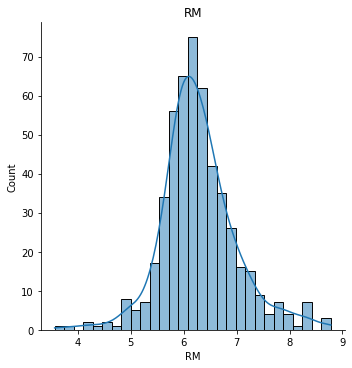

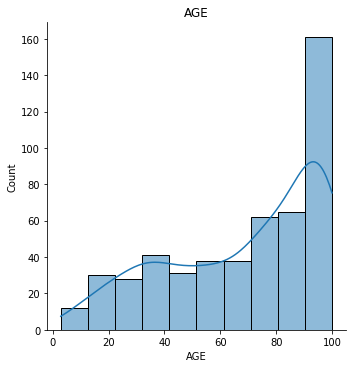

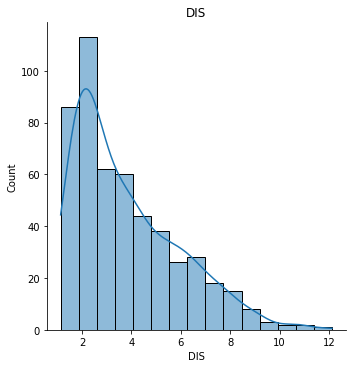

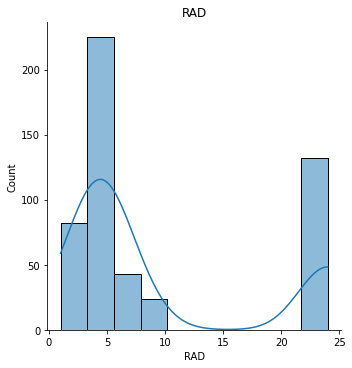

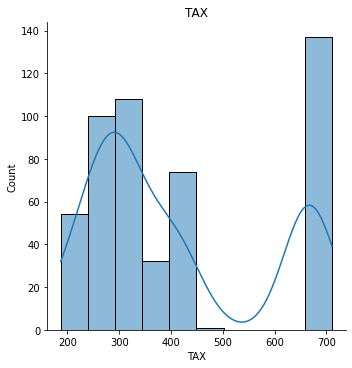

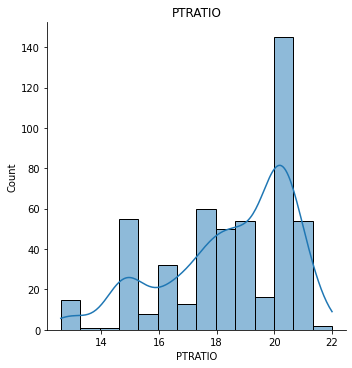

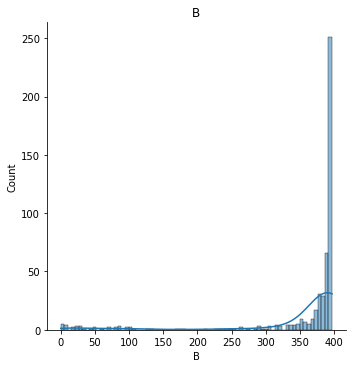

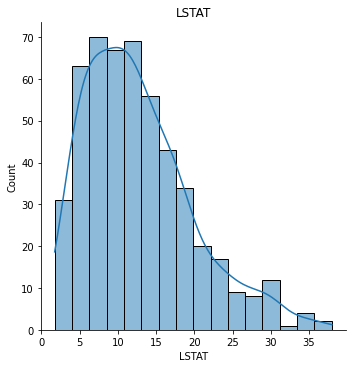

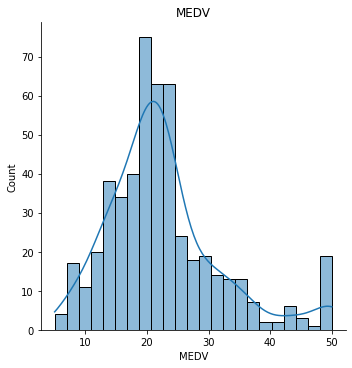

In [561]:

# Histograms of each feature
for feature in df.columns:
    sns.displot(df[feature], kde=True)
    plt.title(feature)
    plt.show()


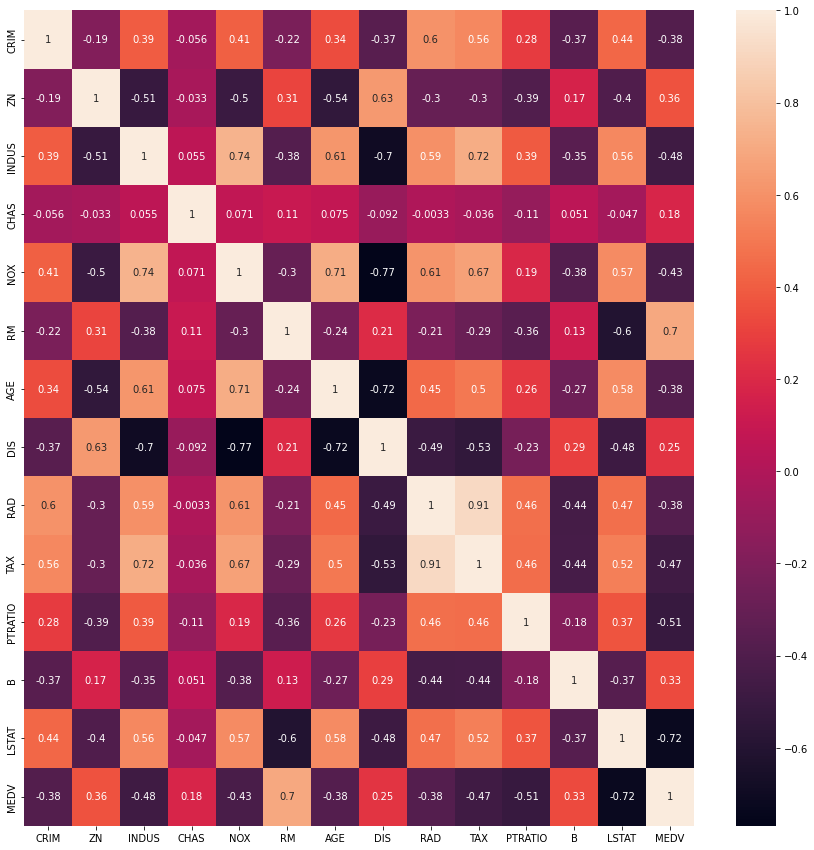

In [562]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True);

From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV

I observed that INDUS, RM, TAX, PTRATIO and LSTAT shows some good correaltion with MEDV and I am interested to know more about them.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


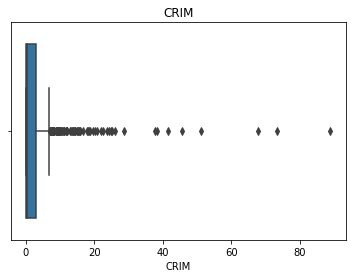

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


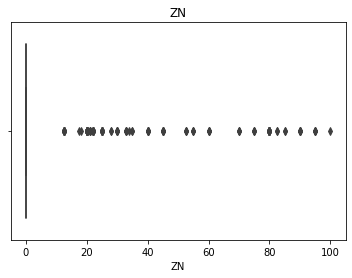

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


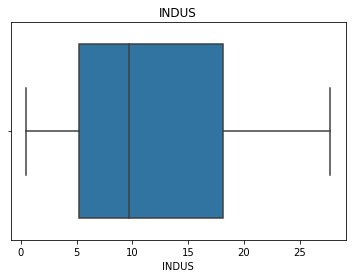

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


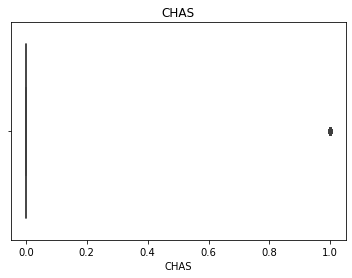

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


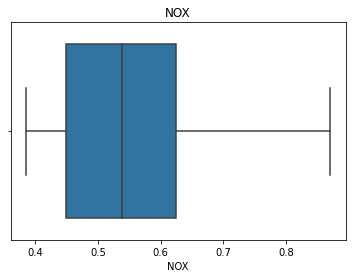

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


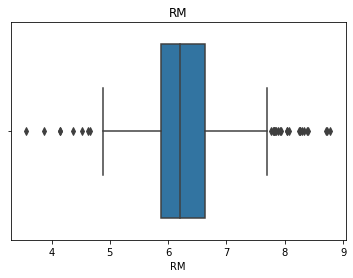

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


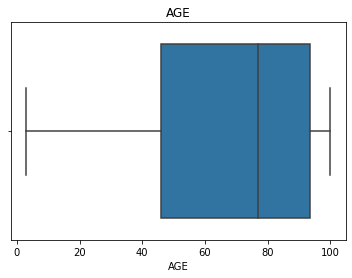

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


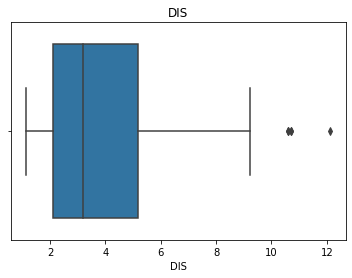

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


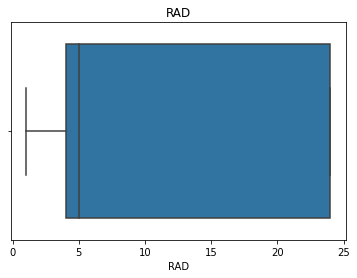

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


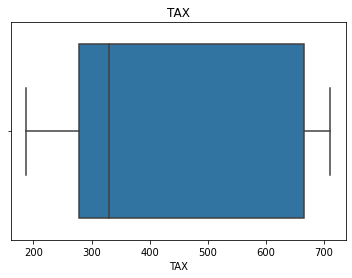

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


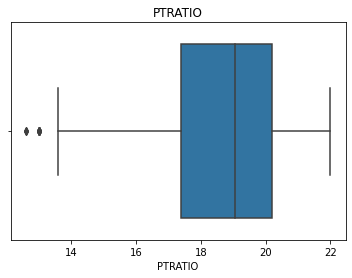

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


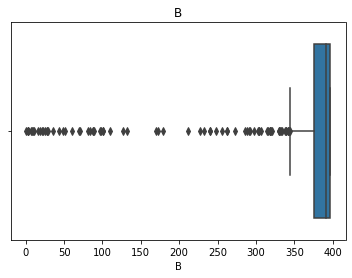

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


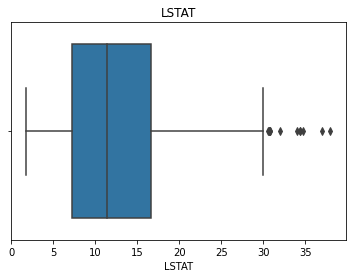

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


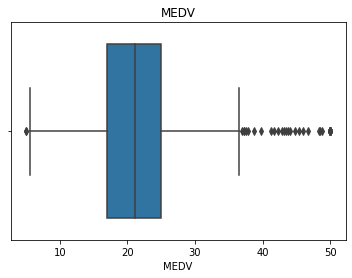

In [563]:
# Boxplots of each feature
for feature in df.columns:
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.show()


In [564]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

         CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0    0.405592  0.314369  1.301706  0.268391  0.144217  0.413672  0.132771   
1    0.403140  0.468160  0.591052  0.268391  0.740262  0.194274  0.366141   
2    0.403142  0.468160  0.591052  0.268391  0.740262  1.282714  0.282080   
3    0.402549  0.468160  1.321115  0.268391  0.835284  1.016303  0.839258   
4    0.398265  0.468160  1.321115  0.268391  0.835284  1.228577  0.533356   
..        ...       ...       ...       ...       ...       ...       ...   
501  0.399015  0.468160  0.134533  0.268391  0.158124  0.439316  0.009255   
502  0.401043  0.468160  0.134533  0.268391  0.158124  0.234548  0.286024   
503  0.399234  0.468160  0.134533  0.268391  0.158124  0.984960  0.806785   
504  0.393531  0.468160  0.134533  0.268391  0.158124  0.725672  0.744876   
505  0.400793  0.468160  0.134533  0.268391  0.158124  0.362767  0.289665   

          DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  

In [565]:
threshold = 3
print(np.where(z > 3))

(array([ 55,  56,  57,  65,  66, 102, 141, 142, 154, 155, 160, 162, 163,
       195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 208, 209, 210,
       211, 212, 216, 218, 219, 220, 221, 222, 225, 234, 236, 254, 255,
       256, 257, 262, 269, 273, 274, 276, 277, 282, 283, 283, 284, 286,
       290, 291, 292, 347, 348, 351, 352, 353, 353, 354, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        5,  3,  3,  1,  1,  1,  5,  5,  3,  3,  3,  3,  3,  3,  1,  3,  1,
        1,  1,  1,  1,  1,  1,  7,  7,  1,  7,  1,  7,  7,  3,  3,  3,  3,
        3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,  0,  

In [566]:
df = df[(z < 3).all(axis=1)]
df.shape

(403, 14)

In [567]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2


In [568]:
#since some of these features shows quite good and very good correlation with our predictive variable Houese Price(MEDV)
df1 = df[['RM','TAX','PTRATIO','LSTAT','MEDV']]
df1.head()

,RM,TAX,PTRATIO,LSTAT,MEDV
0,6.575,296,15.3,4.98,24.0
1,6.421,242,17.8,9.14,21.6
2,7.185,242,17.8,4.03,34.7
3,6.998,222,18.7,2.94,33.4
4,7.147,222,18.7,11.43,36.2


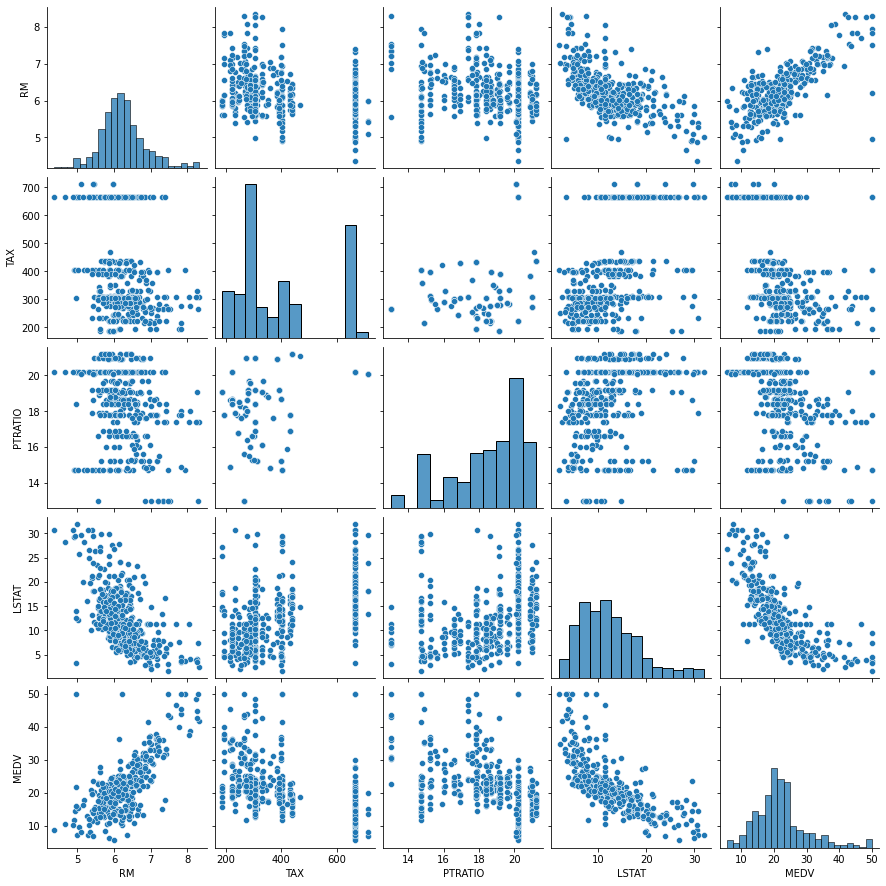

In [569]:
sns.pairplot(data=df1)

In [570]:

column_s = ['LSTAT', 'NOX', 'PTRATIO', 'DIS', 'AGE', 'RM', 'TAX', 'INDUS']
X = df.loc[:,column_s]
y = df.iloc[:, -1]


In [571]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)
X_train.head(10)

,LSTAT,NOX,PTRATIO,DIS,AGE,RM,TAX,INDUS
267,7.44,0.5750,13.0,2.4216,67.0,8.297,264,3.97
312,11.72,0.5440,18.4,2.8340,90.4,6.023,304,9.90
171,12.03,0.6050,14.7,2.3887,97.3,5.880,403,19.58
115,15.76,0.5470,17.8,2.4631,88.2,5.928,432,10.01
17,14.67,0.5380,21.0,4.2579,81.7,5.990,307,8.14
281,4.59,0.4429,14.9,5.2447,76.8,6.968,216,3.33
24,16.30,0.5380,21.0,4.3996,94.1,5.924,307,8.14
397,19.92,0.6930,20.2,1.6334,98.9,5.747,666,18.10
158,6.43,0.6050,14.7,1.7573,100.0,6.066,403,19.58
301,9.50,0.4330,16.1,5.4917,40.4,6.590,329,6.09


In [572]:
#define the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [573]:
y_pred = model.predict(X_test)

In [574]:
y_pred

array([22.785, 20.077, 19.488, 14.81 , 24.148, 23.572, 13.59 , 19.515,
       24.201, 14.724, 14.028, 22.284, 19.644, 13.418, 22.062, 21.721,
       31.426, 25.22 , 17.455, 21.247, 22.771, 22.143, 14.377, 24.492,
       21.717, 18.309, 29.13 , 21.525, 23.077, 19.501, 14.508, 30.963,
       27.564, 19.171, 30.999, 15.318, 20.073,  9.821, 21.638, 11.349,
       21.596, 14.444, 12.926, 20.402, 19.342, 12.4  , 16.632, 19.641,
       41.939, 19.846, 15.725, 15.628, 17.173, 20.794, 20.3  , 17.179,
       21.188, 21.97 , 27.803, 23.471, 18.867, 22.688, 14.515, 46.642,
       20.564, 30.726, 18.572, 20.864, 19.745, 22.735, 20.935, 15.267,
       25.599, 28.828, 13.916, 23.528, 21.691, 27.002, 23.203, 16.134,
       18.838, 18.225, 42.281, 33.743, 18.808, 17.472, 16.605, 11.465,
       18.839, 34.162, 21.954, 20.45 , 41.507, 13.513, 20.856, 19.543,
       33.398, 28.093, 29.009, 17.642, 17.536, 31.123, 26.542, 21.087,
       19.083, 20.632, 22.436, 44.975, 15.788, 18.763, 33.016, 18.737,
      

In [575]:
model.score(X_train,y_train)
model.score(X_test,y_test)

0.7828560723843178

In [577]:
# Define the hyperparameters to search
param_grid = { "n_estimators":[10, 20, 5],
              "max_depth": [1, 5, 10, 20, 50, 100],
              "min_samples_split": [2, 5, 10, 20,30,40],
             }

In [578]:
# Create a grid search object with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [1, 5, 10, 20, 50, 100],
                         'min_samples_split': [2, 5, 10, 20, 30, 40],
                         'n_estimators': [10, 20, 5]})

In [579]:
print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 20}


In [580]:
print(grid_search.score(X_test,y_test))

0.7964638110185572


In [582]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

In [583]:
# Use RandomizedSearchCV for hyperparameter tuning
param_grid = { "n_estimators":[10, 20, 5],
              "max_depth": [1, 5, 10, 20, 50, 100],
              "min_samples_split": [2, 5, 10, 20,30,40]
             }
             
rs_cv = RandomizedSearchCV(model, param_grid, n_iter=20, cv=5,
                           scoring='neg_mean_squared_error', random_state=0)

# Fit the model to the training data
rs_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [1, 5, 10, 20, 50, 100],
                                        'min_samples_split': [2, 5, 10, 20, 30,
                                                              40],
                                        'n_estimators': [10, 20, 5]},
                   random_state=0, scoring='neg_mean_squared_error')

In [584]:
print(rs_cv.best_params_)

{'n_estimators': 20, 'min_samples_split': 2, 'max_depth': 50}


In [585]:
print(rs_cv.score(X_test,y_test))

-13.812590495867772


In [586]:
from sklearn.metrics import r2_score
 # Predict on the test data
y_pred = rs_cv.predict(X)

# Calculate the mean squared error
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

test_set_r2 = r2_score(y, y_pred)

print(test_set_r2)

Mean Squared Error: 5.819199937965262
0.9085003763367911
